In [1]:
# Importar las librerías necesarias
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt


In [2]:
# Leer los datos de entrenamiento desde el archivo pickle
with open("files/datos_entrenamiento.pkl", "rb") as archivo:
    datos_entrenamiento = pickle.load(archivo)

X = datos_entrenamiento['X']
y = datos_entrenamiento['y']

In [3]:
# Dividir el dataset en entrenamiento y prueba (20% prueba, 80% entrenamiento)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Entrenamos un Modelo XGB con los hiperparametros encontrados en la etapa anterior

In [4]:

model_xgb = xgb.XGBClassifier( 
    objective = 'binary:logistic', base_score = None, booster = None,
    callbacks = None, colsample_bylevel = None, colsample_bynode = None,
    colsample_bytree = 0.5, device = None, early_stopping_rounds = None,
    enable_categorical = False, eval_metric = 'auc', feature_types = None,
    feature_weights = None, gamma = 0.5, grow_policy = None,
    importance_type = None, interaction_constraints = None, learning_rate = 0.01,
    max_bin = None, max_cat_threshold = None, max_cat_to_onehot = None,
    max_delta_step = None, max_depth = 10, max_leaves = None,
    min_child_weight = 4, monotone_constraints = None,
    multi_strategy = None, n_estimators = 400, n_jobs = -1,
    num_parallel_tree = None, random_state = None, reg_alpha = None,
    reg_lambda = 0.6, sampling_method = None, scale_pos_weight = None,
    subsample = 0.3, tree_method = None, validate_parameters = None,
    verbosity = None)

model_xgb.fit(X_train, y_train)

# Obtener predicciones
y_pred = model_xgb.predict(X_test)

# Obtener probabilidades
y_prob = model_xgb.predict_proba(X_test)[:, 1]

In [5]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)


array([[56829, 32455],
       [28897, 60249]], dtype=int64)

In [6]:
# Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65     89284
           1       0.65      0.68      0.66     89146

    accuracy                           0.66    178430
   macro avg       0.66      0.66      0.66    178430
weighted avg       0.66      0.66      0.66    178430



In [7]:
# Guardar el modelo XGBClassifier en un archivo pickle
with open("files/model_xgb.pkl", "wb") as archivo:
    pickle.dump(model_xgb, archivo)

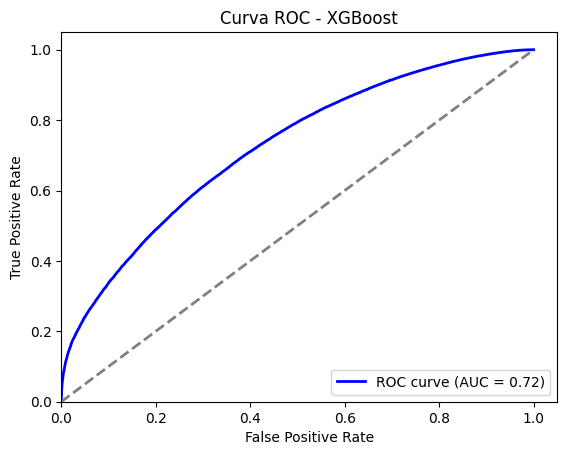

In [ ]:
# Calcular curva ROC para XGBoost
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend(loc="lower right")


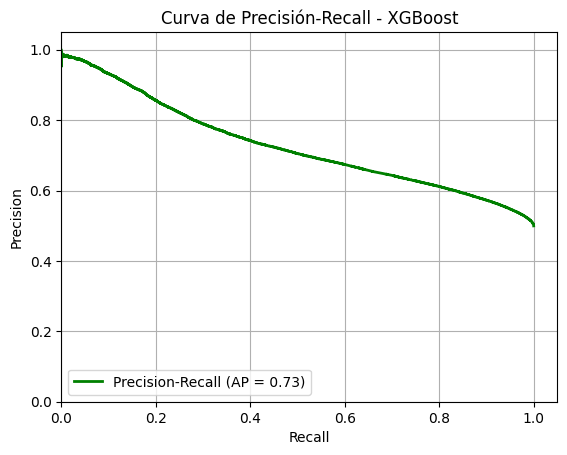

In [9]:

# Calcular curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Graficar curva Precisión-Recall
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall (AP = {avg_precision:.2f})')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - XGBoost')
plt.legend(loc="lower left")
plt.grid(True)



#### Entrenamos un Modelo LGBM con los hiperparametros encontrados en la etapa anterior

In [10]:
model_lgbm = LGBMClassifier(bagging_fraction=0.6500000000000001,
               colsample_bytree=0.6000000000000001, feature_fraction=0.5,
               learning_rate=0.21000000000000002, max_depth=70,
               min_child_samples=2, n_estimators=90, n_jobs=1, num_leaves=60,
               random_state=42, reg_alpha=0.8, reg_lambda=0.6000000000000001)

model_lgbm.fit(X_train, y_train)

# Obtener predicciones
y_pred = model_lgbm.predict(X_test)

# Obtener probabilidades
y_prob = model_lgbm.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.6000000000000001 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6500000000000001
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.6000000000000001 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6500000000000001
[LightGBM] [Info] Number of positive: 356743, number of negative: 356975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2006
[LightGBM] [Info] Number of data points in the train set: 713718, number of used features: 21
[

In [11]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[56788, 32496],
       [28347, 60799]], dtype=int64)

In [12]:
# Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65     89284
           1       0.65      0.68      0.67     89146

    accuracy                           0.66    178430
   macro avg       0.66      0.66      0.66    178430
weighted avg       0.66      0.66      0.66    178430



In [13]:
# Guardar el modelo LGBMClassifier en un archivo pickle
with open("files/model_lgbm.pkl", "wb") as archivo:
    pickle.dump(model_lgbm, archivo)

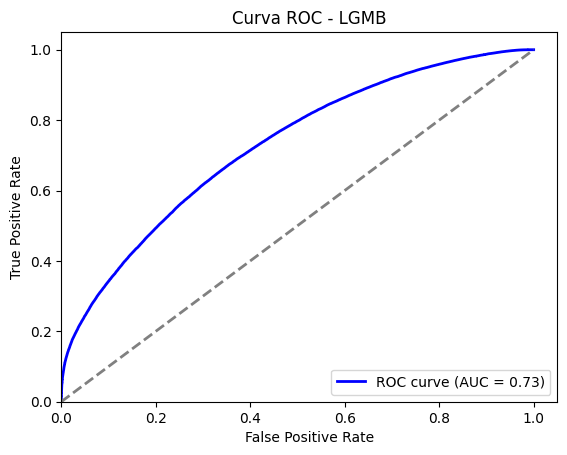

In [14]:
# Calcular curva ROC para XGBoost
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LGMB')
plt.legend(loc="lower right")


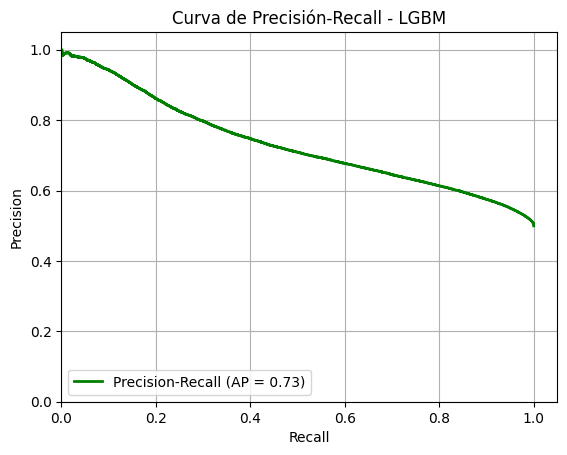

In [15]:
# Calcular curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Graficar curva Precisión-Recall
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall (AP = {avg_precision:.2f})')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - LGBM')
plt.legend(loc="lower left")
plt.grid(True)